<br>
<font size='6'><b>Introdution to Numpy</b></font><br><br>

- by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/)
    - Adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial .

- Neil Lawrence
    - 11th February 2014 [Gaussian Process](http://ml.dcs.shef.ac.uk/gpss/gprs14/) Road Show, Pereira, Colombia


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        Collected by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

$$\newcommand{\inputScalar}{x}
\newcommand{\inputVector}{\mathbf{x}}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\dataScalar}{y}
\newcommand{\dataVector}{\mathbf{y}}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\lengthScale}{\ell}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{w}}
\newcommand{\mappingFunctionScalar}{f}
\newcommand{\mappingFunctionVector}{\mathbf{f}}
\newcommand{\dataStd}{\sigma}
\newcommand{\numData}{n}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\zerosVector}{\mathbf{0}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\mathbf{\epsilon}}
\newcommand{\noiseMatrix}{\mathbf{\Epsilon}}
\newcommand{\basisMatrix}{\mathbf{\Phi}}
\newcommand{\basisVector}{\mathbf{\phi}}
\newcommand{\basisScalar}{\phi}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\meanVector}{\boldsymbol{\mu}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{\kernelScalar}}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\meanScalar}{\mu}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}$$

Welcome to the IPython notebook! We will be using the IPython notebook for all our lab classes and assignments. It is a really convenient way to interact with data using python. In this first lab session we are going to familiarise ourselves with the notebook and start getting used to python whilst we review some of the material from the first lecture.

Python is a generic programming language with 'numerical' and scientific capabilities added on through the numpy and scipy libraries. There are excellent 2-D plotting facilities available through matplotlib.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

# 1. Python Basics



## 1.1. Types

### Numbers

Integers and floats work as you would expect from other languages:

In [14]:
x = 3
print x
print type(x)

3
<type 'int'>


In [15]:
print x + 1   # Addition;
print x - 1   # Subtraction;
print x * 2   # Multiplication;
print x ** 2  # Exponentiation;

4
2
6
9


In [16]:
x += 1
print x  
x *= 2
print x  

4
8


In [17]:
y = 2.5
print type(y) 
print y, y + 1, y * 2, y ** 2 

<type 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [18]:
t, f = True, False
print type(t) # Prints "<type 'bool'>"

<type 'bool'>


In [19]:
print t and f # Logical AND;
print t or f  # Logical OR;
print not t   # Logical NOT;
print t != f  # Logical XOR;

False
True
False
True


### Strings

In [20]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print hello, len(hello)

hello 5


In [21]:
hw = hello + ' ' + world  # String concatenation
print hw  # prints "hello world"

hello world


In [22]:
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print hw12  # prints "hello world 12"

hello world 12


String objects have a bunch of useful methods; for example:

In [23]:
s = "hello"

print s.capitalize()  # Capitalize a string; prints "Hello"
print s.upper()       # Convert a string to uppercase; prints "HELLO"
print s.rjust(7)      # Right-justify a string, padding with spaces; prints "  hello"
print s.center(7)     # Center a string, padding with spaces; prints " hello "
print s.replace('l', '(ell)')  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print '  world '.strip()  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


## 1.2. Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples. We will focus on lists here.

### List
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [24]:
xs = [3, 1, 2]   # Create a list
print xs, xs[2]
print xs[-1]     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [25]:
xs[2] = 'foo'    # Lists can contain elements of different types
print xs

[3, 1, 'foo']


In [26]:
xs.append('bar') # Add a new element to the end of the list
print xs  

[3, 1, 'foo', 'bar']


In [27]:
x = xs.pop()     # Remove and return the last element of the list
print x, xs 

bar [3, 1, 'foo']


### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [30]:
nums = range(5)    # range is a built-in function that creates a list of integers

print nums         # Prints "[0, 1, 2, 3, 4]"
print nums[2:4]    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print nums[2:]     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print nums[:2]     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print nums[:]      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print nums[:-1]    # Slice indices can be negative; prints ["0, 1, 2, 3]"

nums[2:4] = [8, 9] # Assign a new sublist to a slice
print nums         # Prints "[0, 1, 8, 8, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


### Loops

You can loop over the elements of a list like this:

In [31]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print animal

cat
dog
monkey


### List comprehensions:
When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [32]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print squares

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [33]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print squares

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [34]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print even_squares

[0, 4, 16]


### Functions

Python functions are defined using the def keyword. For example:

In [35]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print sign(x)

negative
zero
positive


# 2. Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

The numpy library provides most of the manipulations we need for arrays in python. numpy is short for numerical python, but as well as providing the numerics, numpy provides contiguous array objects. These objects weren't available in the original python. The first step is to import numpy. We'll then use it to draw samples from a "standard normal". A standard normal is a Gaussian density with mean of zero and variance of one. We'll draw 10 samples from the standard normal.

In [36]:
import numpy as np

## 2.1. Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [37]:
a = np.array([1, 2, 3])  # Create a rank 1 array from list
print type(a), a.shape, a[0], a[1], a[2]
a[0] = 5                 # Change an element of the array
print a                  

<type 'numpy.ndarray'> (3L,) 1 2 3
[5 2 3]


In [38]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b

[[1 2 3]
 [4 5 6]]


In [39]:
print b.shape                   
print b[0, 0], b[0, 1], b[1, 0]

(2L, 3L)
1 2 4


Numpy also provides many functions to create arrays:

In [40]:
a = np.zeros((2,2))  # Create an array of all zeros
print a

[[ 0.  0.]
 [ 0.  0.]]


In [41]:
b = np.ones((1,2))   # Create an array of all ones
print b

[[ 1.  1.]]


In [43]:
d = np.eye(2)        # Create a 2x2 identity matrix
print d

[[ 1.  0.]
 [ 0.  1.]]


In [44]:
e = np.random.random((2,2)) # Create an array filled with random values
print e

[[ 0.71065584  0.73860348]
 [ 0.6773975   0.15415733]]


To get help about any command in the notebook simply type that command followed by a question mark.

In [45]:
np.random.random?

## 2.2. Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [46]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array. 

In [47]:
print a[0, 1]  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1] 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing.

Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [49]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [50]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4L,)
[[5 6 7 8]] (1L, 4L)
[[5 6 7 8]] (1L, 4L)


In [52]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3L,)

[[ 2]
 [ 6]
 [10]] (3L, 1L)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [53]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print a[[0, 1, 2], [0, 1, 0]]

# The above example of integer array indexing is equivalent to this:
print np.array([a[0, 0], a[1, 1], a[2, 0]])

[1 4 5]
[1 4 5]


In [54]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print a[[0, 0], [1, 1]]

# Equivalent to the previous integer array indexing example
print np.array([a[0, 1], a[0, 1]])

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [55]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [56]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [57]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print bool_idx

[[False False]
 [ True  True]
 [ True  True]]


In [58]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print a[bool_idx]

# We can do all of the above in a single concise statement:
print a[a > 2]

[3 4 5 6]
[3 4 5 6]


## 2.3. Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [59]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print x + y
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [60]:
# Elementwise difference; both produce the array
print x - y
print np.subtract(x, y)

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [61]:
# Elementwise product; both produce the array
print x * y
print np.multiply(x, y)

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [62]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [63]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print np.sqrt(x)

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [64]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print v.dot(w)
print np.dot(v, w)

219
219


In [65]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print x.dot(v)
print np.dot(x, v)

[29 67]
[29 67]


In [66]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [67]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [68]:
print x
print x.T

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [69]:
v = np.array([1,2,3])
print v 
print v.T

[1 2 3]
[1 2 3]


## 2.4. Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [70]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [71]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print vv                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [72]:
y = x + vv  # Add x and vv elementwise
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [73]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [74]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print np.reshape(v, (3, 1)) * w

[[ 4  5]
 [ 8 10]
 [12 15]]


In [75]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print x + v

[[2 4 6]
 [5 7 9]]


In [76]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print (x.T + w).T

[[ 5  6  7]
 [ 9 10 11]]


In [77]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print x + np.reshape(w, (2, 1))

[[ 5  6  7]
 [ 9 10 11]]


In [78]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print x * 2

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## 2.5. Example with Statistics

In [21]:
X = np.random.normal(0,1,size = (10))

Now let's look at the samples, we can show them using the print command.

In [22]:
print X

[ 0.14988673  1.44921423  0.47279966  0.12062999  0.2569497   0.04487856
 -0.96258943 -0.87315315 -0.0484583   1.44852432]


In [23]:
Z = X
print Z[0]
print X[0]

0.149886730867
0.149886730867


copy reference in python

In [24]:
X[0] = 2.5
print Z[0]
print X[0]

2.5
2.5


In [28]:
X = np.random.normal(0,1,size = (10))
Y = X.copy()
print X

X[0] = 2.5
print Y[0]
print X[0]

[ 1.09652594 -0.65162235 -0.74262131 -0.25896335 -0.33690896 -0.33442358
  0.26412391  0.52086058  0.36908399  0.85707993]
1.09652594187
2.5


__Estimating Moments__

We can compute the sample mean by adding all the samples together and dividing by the number of samples.

In [35]:
X = np.random.normal(0,1,size = (10,1))

In [38]:
print X

[[-0.35150197]
 [ 0.32149877]
 [-0.90823496]
 [-1.4179425 ]
 [-0.41697441]
 [-0.76783342]
 [-0.17675316]
 [-1.35874284]
 [ 1.19052441]
 [ 1.02073583]]


In [41]:
X.shape

(10L, 1L)

In [36]:
X.mean()

-0.28652242599555694

In [37]:
X.mean(axis = 0)

array([-0.28652243])

In [42]:
X.mean(axis = 1)

array([-0.35150197,  0.32149877, -0.90823496, -1.4179425 , -0.41697441,
       -0.76783342, -0.17675316, -1.35874284,  1.19052441,  1.02073583])

In [43]:
X.mean(axis = 1).shape

(10L,)

broadcasting in python

In [44]:
Z = X - X.mean()
Z.mean()

4.4408920985006264e-17

which is easy to write in code as follows

In [ ]:
X.var()

We know in this case, because we sampled from a standard normal, that the mean and variance of the distribution should be 0 and 1. Why do you not get a mean of 0 and a variance of 1? Let's explore what happens as we increase the number of samples. To do this we are going to use for loops and python lists. We start by creating empty lists for the means and variances. Then we create a list of integers to iterate through. In Python, a for loop always iterates through a list (in some languages this is called a foreach loop, its counterpart the counter for loop only exists by creating a list of integers, see http://en.wikipedia.org/wiki/Foreach_loop#Python). We can use the range command to create the numbers of samples. 

In [50]:
# python list
means = []
variances = []

samples = [10, 50, 100, 500, 1000, 5000, 
           10000, 50000, 100000] 

for n in samples:
    x = np.random.randn(n)
    mean = x.mean()
    variance = (x**2).mean() - mean**2
    means.append(mean)
    variances.append(variance)


In [51]:
print means

[0.20663199418475528, -0.19140327494610848, 0.018457432250995345, 0.020547640478314599, 0.00063401213828129244, 0.00874165603218394, 0.0091843545812921052, 0.00025376240500639007, 0.00088048387683950524]


here, means is a list

In [53]:
# now means is np array
means = np.asarray(means)
print means

[ 0.20663199 -0.19140327  0.01845743  0.02054764  0.00063401  0.00874166
  0.00918435  0.00025376  0.00088048]


# 3. Plotting in Python

We'll now plot the variance and the mean against the number of samples. To do this, we need to first convert the samples, varianes and means from Python lists, to numpy arrays.

In [ ]:
means = np.asarray(means)
variances = np.asarray(variances)
samples = np.asarray(samples)

Next we need to include the plotting functionality from matplotlib, and instruct IPython notebook to include the plots *inline* with the notebook, rather than in a different window. First we import the plotting library, matplotlib.

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

By running this special iPython command, we will be displaying plots inline:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

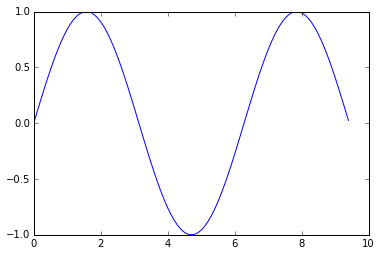

In [7]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0,3*np.pi,0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

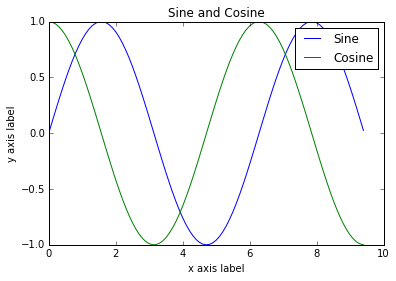

In [12]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

Here we plot the estimated mean against the number of samples. However, since the samples go up logarithmically it's better to use a logarithmic axis for the x axis, as follows.

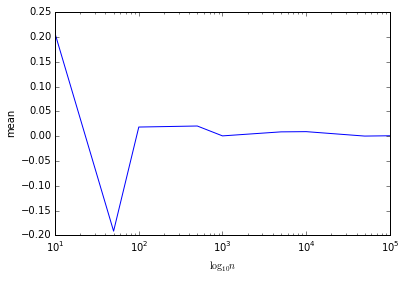

In [54]:
plt.semilogx(samples, means)
xlabel('$\log_{10}n$')
ylabel('mean')

We can do the same for the variances, again using a logarithmic axis for the samples. This time, we're going to lavel the x axis using a latex formula.

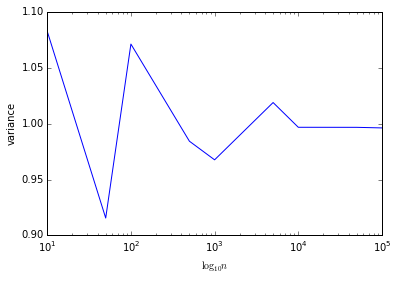

In [55]:
plt.semilogx(samples, variances)
xlabel('$\log_{10}n$')
ylabel('variance')

## Subplots 
You can plot different things in the same figure using the subplot function. You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

Here is an example:

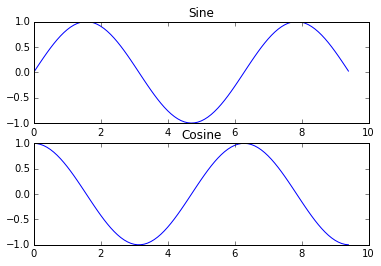

In [81]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

In [87]:
%%html
<iframe src="https://www.youtube.com/embed/QE7UzVG1o-I"
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [86]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>